## Notebook to generate "pretty" graphs (for educational problems in physics and related subjects)

This Jupyer (Python) notebook was created out of my need to generate "pretty" graphs that would go with examples and problems that I created mostly for the teaching needs of my physics classes. And I am **Eugen Rožić**, prof., and have put this notebook on my __[GitHub](https://github.com/erozic)__ for free use on 25.9.2025. You can find other potentially useful educational content, including among other things the problems that contain graphs generated with this notebook, on my __[website](https://erozic.github.io)__. Unfortunately the educational content is mostly (or exclusively) in croatian.

##### Instructions for use
Each of the cells needs to be executed (_shift+Enter_) at least once, some of them possibly need adapting to your needs. Each cell contains comments (behind the # signs) that contain some instructions and clarifications of the code. If one reads them carefully one should be able to make use of the notebook, at least anyone that is knowledgable or resourceful enough to have been able to start the thing in the first place.

Hope it will be of use :)

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# This is the main method which in principle defines a function (in time) that is consisted of connected parts of (maximum) second degree polinomes
# The parameters are:
#   t - function input, the value of the variable for which this "function" gives the output
#   y0 - starting value of the function (at t=0)
#   Ts - list of "moments" in time (input variable values) where the function "changes"
#   A1s - list linear coefficients for the function in the different parts (has to be same length as Ts)
#   A2s - list of quadratic coefficients for the function in the different parts (has to be same length as Ts), or None
def graph(t, y0, Ts, A1s, A2s = None):
    if t<0:
        return 0
    if t>Ts[-1]:
        return graph(Ts[-1], y0, Ts, A1s, A2s)
    i = 0
    for T in Ts:
        if t>T:
            i += 1 #should never be more than len(Ts)
        else:
            break
    if A2s == None:
        A2s = [0]*len(A1s)
    if i == 0:
        return y0 + t*A1s[i] + t*t*A2s[i]/2
    else:
        t = t-Ts[i-1]
        return graph(Ts[i-1], y0, Ts, A1s, A2s) + t*A1s[i] + t*t*A2s[i]/2

### Example 1: an x(t) graph

Just change the values at the start of the cell below to change the function then run it (_shift+Enter_) to see the result.

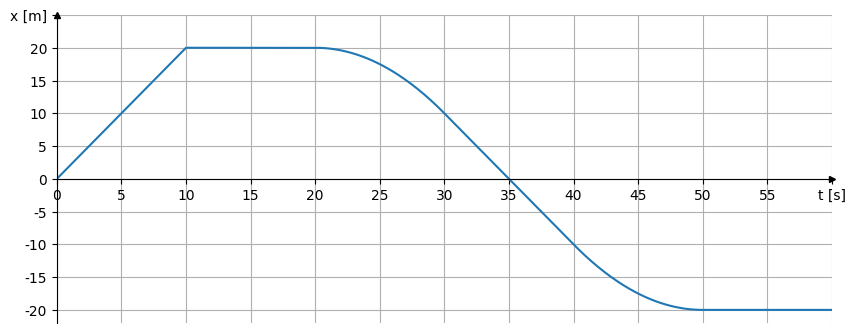

In [8]:
x0 = 0
Ts = [10,20,30,40,50,60]
Vs = [2,0,0,-2,-2,0]
As = [0,0,-0.2,0,0.2,0]

dt = 0.1
ts = np.arange(0, max(Ts)+dt, dt)

fig = plt.figure(figsize=[10, 4]) # HERE you can change the size of the generated graph image
ax = fig.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# make arrows
ax.plot((1), (0), ls="", marker=">", ms=5, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=5, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
# x-axis
#plt.xlabel('t [s]')
ax.set_xlim([0, max(ts)+0])
xticks = range(0, max(Ts)+5, 5)
ax.set_xticks(xticks)
xticks = list(xticks)
xticks[-1] = 't [s]' # HERE you can change the label of the x-axis
ax.set_xticklabels(xticks)
#plt.setp(ax.xaxis.get_majorticklabels(), ha="left" )
# y-axis
#plt.ylabel('x [m]')
ax.set_ylim([-22, 25])
yticks = range(-20, 26, 5)
ax.set_yticks(yticks)
yticks = list(yticks)
yticks[-1] = 'x [m]' # HERE you can change the label of the y-axis
ax.set_yticklabels(yticks)

plt.plot(ts, [graph(t, x0, Ts, Vs, As) for t in ts])
plt.grid()
plt.show()

### Example 2: a v(t) graph

Just change the values at the start of the cell below to change the function then run it (_shift+Enter_) to see the result.

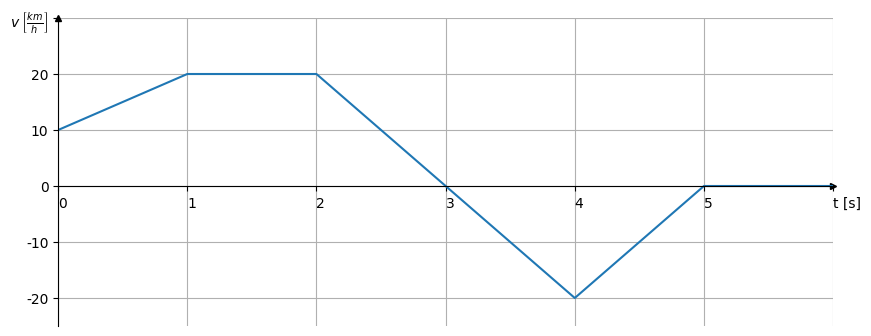

In [9]:
v0 = 10
Ts = [1, 2, 4, 5, 6]
As = [10, 0, -20, 20, 0]

dt = 0.1
ts = np.arange(0, max(Ts)+dt, dt)

fig = plt.figure(figsize=[10, 4]) # HERE you can change the size of the generated graph image
ax = fig.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# make arrows
ax.plot((1), (0), ls="", marker=">", ms=5, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=5, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
# x-axis
#plt.xlabel('t [s]')
ax.set_xlim([0, max(ts)+0])
xticks = range(0, max(Ts)+1, 1)
ax.set_xticks(xticks)
xticks = list(xticks)
xticks[-1] = 't [s]' # HERE you can change the label of the x-axis
ax.set_xticklabels(xticks)
plt.setp(ax.xaxis.get_majorticklabels(), ha="left" )
# y-axis
#plt.ylabel('v [km/h]')
ax.set_ylim([-25, 30])
yticks = range(-20, 31, 10)
ax.set_yticks(yticks)
yticks = list(yticks)
yticks[-1] = r'$v\;\left[\frac{km}{h}\right]$' # HERE you can change the label of the y-axis
ax.set_yticklabels(yticks)

plt.plot(ts, [graph(t, v0, Ts, As) for t in ts])
plt.grid()
plt.show()

### Example 3: an a(t) graph

Here I give an example of how to draw functions with non-differentiable "jumps", like one often needs for acceleration graphs, which are most commonly (on the secondary education level) just part-wise constant with abrupt changes.

This is accomplished by setting a very small "timestep" (dt) and then having dt-wide parts in the function with a slope inversely-proportional to the timestep (width). The numerator of the slope will then define the "height" of the "jump".

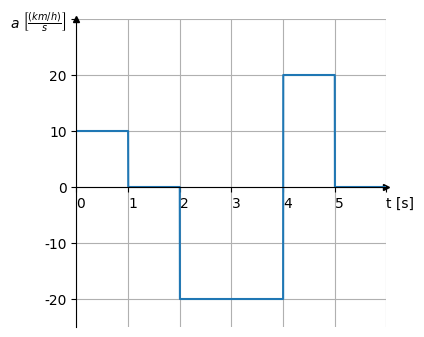

In [10]:
dt = 0.001 # the "timestep"

a0 = 10
Ts = [1, 1+dt, 2, 2+dt, 4, 4+dt, 5, 5+dt, 6]
As = [0, -10/dt, 0, -20/dt, 0, 40/dt, 0, -20/dt, 0]

ts = np.arange(0, max(Ts)+dt, dt)

fig = plt.figure(figsize=[4, 4]) # HERE you can change the size of the generated graph image
ax = fig.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# make arrows
ax.plot((1), (0), ls="", marker=">", ms=5, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=5, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
# x-axis
#plt.xlabel('t [s]')
ax.set_xlim([0, max(ts)+0])
xticks = range(0, max(Ts)+1, 1)
ax.set_xticks(xticks)
xticks = list(xticks)
xticks[-1] = 't [s]' # HERE you can change the label of the x-axis
ax.set_xticklabels(xticks)
plt.setp(ax.xaxis.get_majorticklabels(), ha="left" )
# y-axis
#plt.ylabel('v [km/h]')
ax.set_ylim([-25, 30])
yticks = range(-20, 31, 10)
ax.set_yticks(yticks)
yticks = list(yticks)
yticks[-1] = r'$a\;\left[\frac{(km/h)}{s}\right]$' # HERE you can change the label of the y-axis
ax.set_yticklabels(yticks)

plt.plot(ts, [graph(t, a0, Ts, As) for t in ts])
plt.grid()
plt.show()

For various other uses (like F-s graphs, or whatever on the x and y axes) you can just c/p the code from the above cells and then fiddle with it a bit, I'm sure you'll figure it out and manage to adapt it to your needs :)